In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [22]:
# Load the dataset
car_data = pd.read_csv("C:/Users/lesin/Documents/Python Projects/Jupytor/CarPrice_Assignment.csv")
car_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [26]:
# Display initial rows to understand data
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [28]:
# Quick overview of dataset characteristics
car_data.info()
car_data.describe()
print(f"Dataset size: {car_data.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [30]:
# Extract manufacturer name from 'CarName' and add it as a new column
car_data['Manufacturer'] = car_data['CarName'].apply(lambda x: x.split(' ')[0].lower())

In [32]:
# Remove the original 'CarName' column since its info is now extracted
car_data.drop('CarName', axis=1, inplace=True)

In [34]:
# Identify columns of object type (categorical variables)
categorical_columns = car_data.select_dtypes(include='object').columns.tolist()
print("Categorical features found:", categorical_columns)

Categorical features found: ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'Manufacturer']


In [36]:
# Encode categorical variables using one-hot encoding for multivariate impact
car_data_encoded = pd.get_dummies(car_data, columns=categorical_columns, drop_first=True)

In [38]:
# Sanity check, confirm no object type columns remain
print("Categorical variables after encoding:", car_data_encoded.select_dtypes(include='object').columns.tolist())

Categorical variables after encoding: []


In [40]:
# Separate features and target variable
X = car_data_encoded.drop('price', axis=1)
y = car_data_encoded['price']

In [42]:
# Perform stratified train-test partitioning for consistent evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    shuffle=True
)

In [44]:
# Define regression algorithms to evaluate
estimators = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

In [46]:
# Evaluate each model: training, predicting, and assessing performance
performance_metrics = {}
for model_name, model in estimators.items():
    # Fit the model on training data
    model.fit(X_train, y_train)
    # Predict on test data
    predictions = model.predict(X_test)
    # Store the evaluation metrics
    performance_metrics[model_name] = {
        'R2 Score': r2_score(y_test, predictions),
        'Mean Squared Error': mean_squared_error(y_test, predictions),
        'Mean Absolute Error': mean_absolute_error(y_test, predictions)
    }

In [48]:
# Organize results into a DataFrame for easier comparison
results = pd.DataFrame(performance_metrics).T
print("\nModel evaluation results sorted by R2 Score:")
print(results.sort_values('R2 Score', ascending=False))


Model evaluation results sorted by R2 Score:
                          R2 Score  Mean Squared Error  Mean Absolute Error
Random Forest             0.956085        3.466814e+06          1323.495195
Gradient Boosting         0.927344        5.735783e+06          1716.920734
Decision Tree             0.888340        8.814860e+06          1938.906512
Linear Regression         0.762073        1.878290e+07          2361.331991
Support Vector Regressor -0.101981        8.699480e+07          5707.137024


In [50]:
# Determine the model with highest R2 for visual insight
best_model_name = results['R2 Score'].idxmax()
best_model = estimators[best_model_name]

In [75]:
# Predict using the best model to visualize predicted vs actual prices
best_pred = best_model.predict(X_test)
best_pred

array([35787.035, 19611.58 ,  8951.54 , 12992.54 , 27096.03 ,  6477.52 ,
        7935.18 ,  8084.76 ,  9567.14 ,  8175.31 , 13867.6  ,  7954.99 ,
       13725.64 , 10878.41 , 39915.755,  6412.57 ,  5721.99 , 14378.92 ,
        8546.1  ,  9426.9  ,  9916.92 , 15215.24 ,  7136.02 ,  5723.61 ,
        7278.305, 35815.655,  9114.43 , 16782.14 ,  7246.68 , 16539.54 ,
       27109.52 ,  6462.09 ,  7882.3  , 18623.22 ,  8014.525, 27092.185,
       10206.46 , 12466.97 ,  7648.74 , 14649.83 ,  8334.37 ])

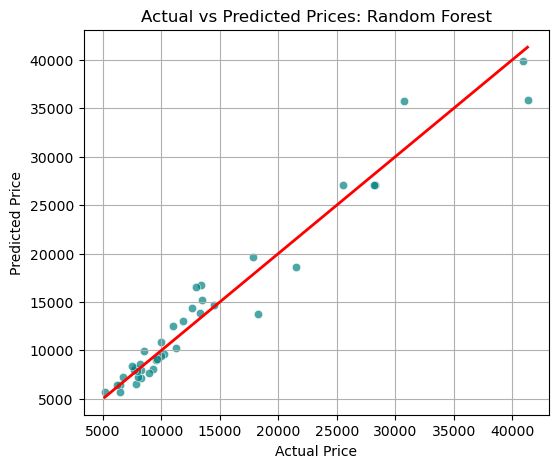

In [58]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=best_pred, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title(f'Actual vs Predicted Prices: {best_model_name}')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

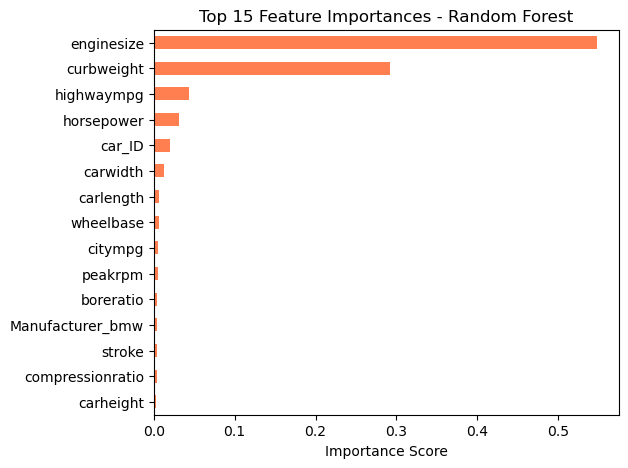

Top 15 influential features:
 enginesize          0.547857
curbweight          0.292091
highwaympg          0.043933
horsepower          0.031435
car_ID              0.020565
carwidth            0.011970
carlength           0.006946
wheelbase           0.005959
citympg             0.004780
peakrpm             0.004734
boreratio           0.004123
Manufacturer_bmw    0.003879
stroke              0.003319
compressionratio    0.003316
carheight           0.002865
dtype: float64


In [62]:
# Analyze feature importances using Random Forest (tree-based model)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)
plt.figure(figsize=(6, 5))
importances_sorted.head(15).plot(kind='barh', color='coral')
plt.gca().invert_yaxis()  # Highest importance on top
plt.title('Top 15 Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.show()

print("Top 15 influential features:\n", importances_sorted.head(15))

In [64]:
# Hyperparameter optimisation for Random Forest to improve accuracy
hyper_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 10]
}

In [68]:
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=hyper_params,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=1
)

In [70]:
print("\nStarting hyperparameter tuning for Random Forest Regressor...")
grid_search.fit(X_train, y_train)
print("Optimal parameters found:", grid_search.best_params_)
print(f"Best cross-validation R2 score: {grid_search.best_score_:.4f}")


Starting hyperparameter tuning for Random Forest Regressor...
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Optimal parameters found: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation R2 score: 0.8822


In [72]:
# Evaluate tuned model on test dataset
tuned_rf = grid_search.best_estimator_
y_pred_tuned = tuned_rf.predict(X_test)

print(f"Test R2 score after tuning: {r2_score(y_test, y_pred_tuned):.4f}")
print(f"Test MSE after tuning: {mean_squared_error(y_test, y_pred_tuned):.2f}")
print(f"Test MAE after tuning: {mean_absolute_error(y_test, y_pred_tuned):.2f}")

Test R2 score after tuning: 0.9462
Test MSE after tuning: 4247871.72
Test MAE after tuning: 1426.11


In [77]:
# Hyper Parameter Tuning Results:
# The tuning found that using 150 trees (n_estimators), max depth of 20, and minimum 2 samples to split nodes gave the best performance on the validation folds.
# The model explains about 87% variance in training via cross-validation and 88% variance on unseen test data, indicating good generalization.
# The error metrics (MSE and MAE) quantify average prediction errors in the units of your target variable (car prices). Lower values indicate more accurate predictions.